In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\MY-PC\OneDrive - Sagesse University\Desktop\Loan_Approval\cleaned1_loan_data.csv")  
print(df.shape)         # Rows and columns
print(df.columns)       # Column names
print(df.dtypes)        # Data types
print(df.describe())    # Summary statistics
print(df['loan_status'].value_counts())
print(df['loan_status'].value_counts(normalize=True))  # Proportion

import numpy as np
import seaborn as sns

df.nunique()
df.isnull().sum()

#EDA 
df['loan_status'].value_counts()

df.duplicated().sum()
df['loan_intent'].value_counts()

percentile_99 = df['person_income'].quantile(0.99)
df = df[df['person_income'] <= percentile_99]



(44990, 14)
Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object
         person_age  person_income  person_emp_exp     loan_a

In [2]:
percentile_99 = df['person_income'].quantile(0.99)
df = df[df['person_income'] <= percentile_99]


In [3]:
print(df['loan_status'].value_counts())
print(df.groupby('loan_status')['person_income'].mean())

loan_status
0    34190
1     9904
Name: count, dtype: int64
loan_status
0    79387.039193
1    57076.321486
Name: person_income, dtype: float64


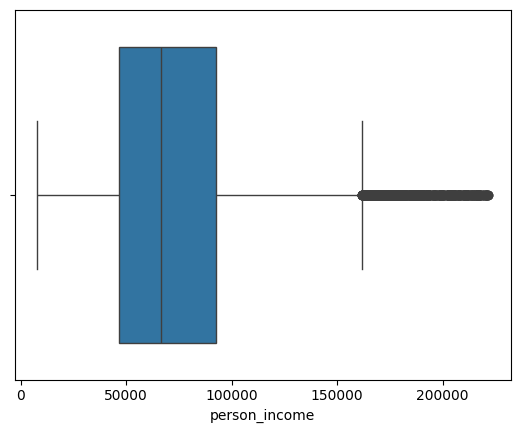

In [4]:
df['person_income'].describe()
#df['loan_intent'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['person_income'])
plt.show()



In [5]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 0 else 0)
df['loan_status'] = df['loan_status'].replace({0: 'Rejected', 1: 'Approved'})
print(df.groupby('loan_status')['person_income'].mean())

loan_status
Approved    79387.039193
Rejected    57076.321486
Name: person_income, dtype: float64


In [6]:
# Example for 'person_income'

Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['person_income'] >= lower_bound) & (df['person_income'] <= upper_bound)]


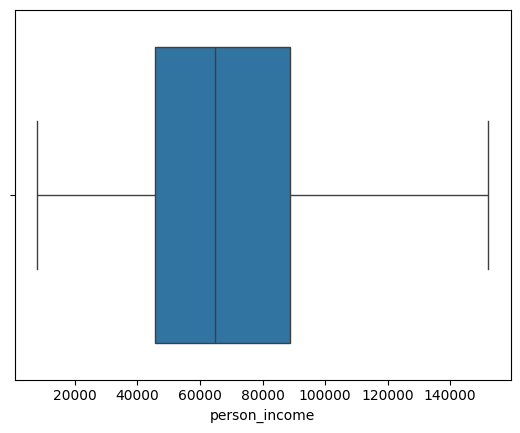

In [7]:
percentile_99 = df['person_income'].quantile(0.99)
df = df[df['person_income'] <= percentile_99]
df['person_income'].describe()
#df['loan_intent'].value_counts()
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['person_income'])
plt.show()




In [8]:
print(df.groupby('loan_status')['person_income'].mean())


loan_status
Approved    73803.431784
Rejected    54779.805310
Name: person_income, dtype: float64


In [10]:
import pandas as pd

# 1. Load your data
df = pd.read_csv(r"C:\Users\MY-PC\OneDrive - Sagesse University\Desktop\Loan_Approval\cleaned1_loan_data.csv")  

# 2. Dataset Overview
print("🔹 Shape (rows, columns):", df.shape)
print("\n🔹 Column Names:", df.columns.tolist())
print("\n🔹 Data Types and Nulls:")
print(df.info())

# 3. Descriptive Statistics for Numerical Columns
print("\n🔹 Summary Statistics (Numerical):")
print(df.describe())

# 4. Check Missing Values
print("\n🔹 Missing Values Per Column:")
print(df.isnull().sum())

# 5. Check Duplicated Rows
print("\n🔹 Number of Duplicated Rows:")
print(df.duplicated().sum())

# 6. Unique Values Per Column
print("\n🔹 Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# 7. Target Variable Distribution
print("\n🔹 Loan Status Distribution:")
print(df['loan_status'].value_counts())
print("\n🔹 Loan Status (Percentage):")
print(df['loan_status'].value_counts(normalize=True))

# 8. Value Counts for Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("\n🔹 Value Counts for Categorical Columns:")
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())

# 9. Grouped Analysis by Target (loan_status)
print("\n🔹 Grouped Stats by Loan Status:")
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 
                  'loan_percent_income', 'cb_person_cred_hist_length']

for col in numerical_cols:
    print(f"\n{col} by loan_status:")
    print(df.groupby('loan_status')[col].describe())

# 10. Correlation Matrix (Textual)
print("\n🔹 Correlation Between Numerical Features:")
print(df.select_dtypes(include='number').corr())

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())


🔹 Shape (rows, columns): (44990, 14)

🔹 Column Names: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

🔹 Data Types and Nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44990 entries, 0 to 44989
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44990 non-null  float64
 1   person_gender                   44990 non-null  object 
 2   person_education                44990 non-null  object 
 3   person_income                   44990 non-null  float64
 4   person_emp_exp                  44990 non-null  int64  
 5   person_home_ownership           44990 non-null  object 
 6   loan_amnt                       44990 non-nu